In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = 'tao.jpg'
img = cv2.imread(img_path)
img.shape

(960, 1440, 3)

(-0.5, 1439.5, 959.5, -0.5)

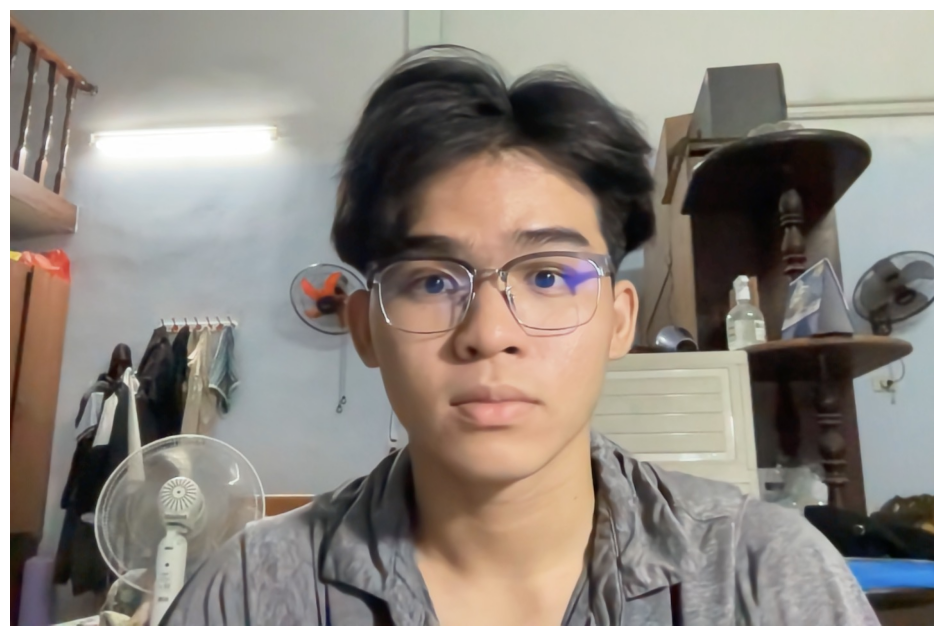

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(img_rgb)
plt.axis('off')

#### FACE DETECTION

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Load the pre-trained Haar Cascade face detector
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt2.xml")
face = face_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(40,40))
### Drawing the bouding box
for (x,y,w,h) in face:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 4)

(-0.5, 1439.5, 959.5, -0.5)

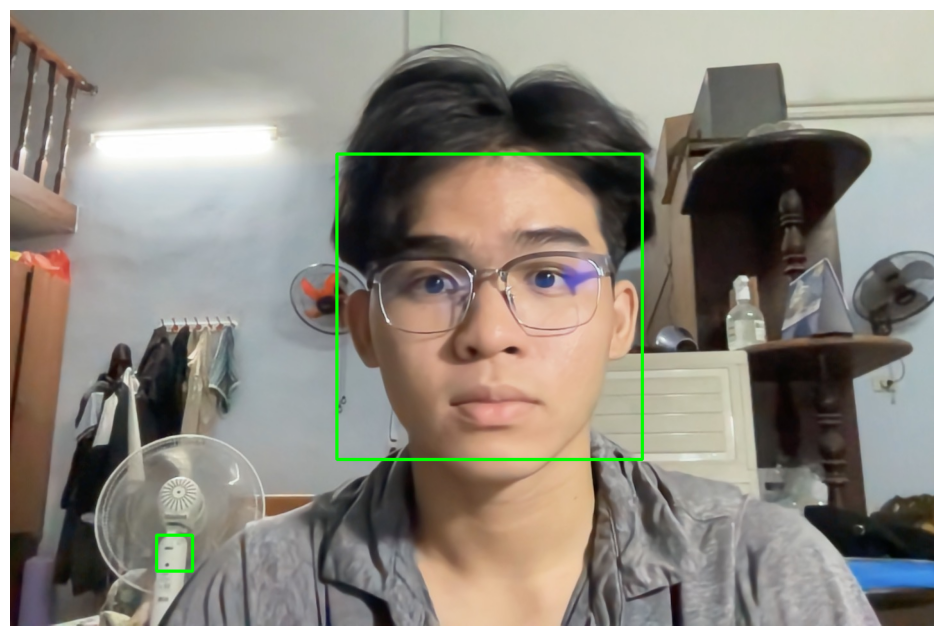

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(img_rgb)
plt.axis('off')

#### REAL TIME FACE_DETECTION 

In [ ]:
import cv2

capture = cv2.VideoCapture(0)

frame_width = int(capture.get(3)) 
frame_height = int(capture.get(4)) 

size = (frame_width, frame_height) 

result = cv2.VideoWriter(
    'video.avi',  
    cv2.VideoWriter_fourcc(*"MJPG"),
    10, size)

while True:
    status, frame = capture.read()
    if not status:
        break

    result.write(frame)

In [20]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
video_cap = cv2.VideoCapture("./video.avi")

frame_width = int(video_cap.get(3)) 
frame_height = int(video_cap.get(4)) 

size = (frame_width, frame_height) 

output = cv2.VideoWriter(
    'video_motion.avi',  
    cv2.VideoWriter_fourcc(*'MJPG'),
    10, size)

### Identifuing faces in the video stream
#### draw the bouding box
def detect_face(vid):
    gray = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.1,5,minSize=(40,40))
    for (x,y,w,h) in faces:
        cv2.rectangle(vid, (x,y), (x+w, y+h),(0,255,0),4)
    return vid
### Creating a loop for real_time face detection
while True:
    result, video_frame = video_cap.read()
    if result is False:
        break
    faces = detect_face(video_frame)
    # cv2.imshow('Face detection', video_frame)
    cv2.imwrite("./image_of_results.png", video_frame)
    output.write(video_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


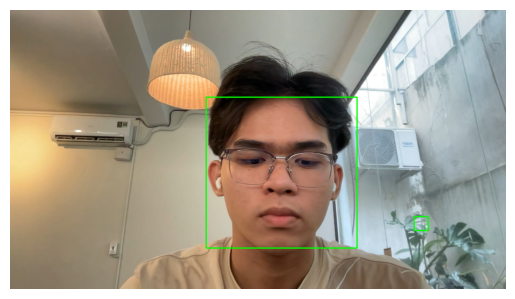

In [26]:
img = cv2.imread("./image_of_results.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()